# Project: Investigate a Dataset of "tmbd-movies"

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

During the project we will use data set of "Tmbd-Movies" dataset that shows movies produced from 1966 to 2015 with their rates and revenues.

During this investigation we will answer the following questions:
   <li> 1- What is the most factor that affects the revenues?
   <li> 2- Which genres are most popular?
    <li>3- Which year is the highest one in getting total revenues?
    <li>4- who is the director produced the largest number of movies?
    <li>5- which movie has the highest net profit ? (net profit = revenues - production cost)
        <li>6- Finally, is there correlation between number of votes and the vate rate ?! so we cannot trust in the votes with small number of voters ?!

In [2]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import pandas as pd
import numpy as np
import matplotlib as plt
import scipy.stats as stats
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='wrangling'></a>
## Data Wrangling

> During this section, we will check for the cleanliness of the data. As we will remove the unwanted columns, the NaN values (missing data). Also we will remove the rows with zero revenues ( as we will considerd it as missing data).

### General Properties

In [3]:
#read the data
df=pd.read_csv("https://d17h27t6h515a5.cloudfront.net/topher/2017/October/59dd1c4c_tmdb-movies/tmdb-movies.csv")

#check for first 5 rows in the data
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


Note that:
<li>The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.

In [4]:
#remove the unwanted columns
#We will remove [id, imdb_id, budget, revenue, homepage, tagline, keywords,overview, release_date]
df.drop(columns={'id', 'imdb_id', 'budget', 'revenue', 'homepage', 'tagline', 'keywords','overview', 'release_date'},inplace=True)

In [5]:
#check for quick data statistics to understand the data better
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,0.646441,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,1.000185,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,0.000065,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,0.207583,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,0.383856,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,0.713817,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,32.985763,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


> As we can see, we have movies with no runtime, also we have around 50% of the data with no revenues and budget that makes the standard deviation of the two columns is very high!.

In [6]:
#now let's check for the data types
df.dtypes

popularity              float64
original_title           object
cast                     object
director                 object
runtime                   int64
genres                   object
production_companies     object
vote_count                int64
vote_average            float64
release_year              int64
budget_adj              float64
revenue_adj             float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 12 columns):
popularity              10866 non-null float64
original_title          10866 non-null object
cast                    10790 non-null object
director                10822 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 1018.8+ KB


> From (dtypes) and (info()) we can conclude that:
> <li> The types of all columns are convenient
> <li> There are missing data in some columns like: cast, director, production companies and genres

### Data Cleaning 
> During this section we will remove the rows that contain NaN values (missing data). also we will remove the rows with zero revenues or zero budget to make the analysis more realistic

In [8]:
#remove the NaN values (missing data)
df.dropna(axis=0, inplace=True)

In [9]:
#remove the rows with zero revenues
mask=df[df["revenue_adj"]==0]
df.drop(mask.index, inplace=True)


In [10]:
#remove the rows with zero budget
mask2=df[df["budget_adj"]==0]
df.drop(mask2.index, inplace=True)

In [11]:
#check for minimum and maximum values again
df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3806.000000,3806.000000,3806.000000,3806.000000,3806.000000,3.806000e+03,3.806000e+03
mean,1.203625,109.346558,534.047556,6.170257,2001.231477,4.471590e+07,1.386797e+08
std,1.480407,19.845063,883.668197,0.792560,11.329019,4.488171e+07,2.169803e+08
min,0.010335,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.470673,96.000000,74.000000,5.700000,1995.000000,1.354637e+07,1.923514e+07
50%,0.810226,106.000000,208.500000,6.200000,2004.000000,3.038360e+07,6.283467e+07
75%,1.387058,119.000000,584.000000,6.700000,2010.000000,6.083489e+07,1.657273e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


In [12]:
#check for non-NaN values again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3806 entries, 0 to 10848
Data columns (total 12 columns):
popularity              3806 non-null float64
original_title          3806 non-null object
cast                    3806 non-null object
director                3806 non-null object
runtime                 3806 non-null int64
genres                  3806 non-null object
production_companies    3806 non-null object
vote_count              3806 non-null int64
vote_average            3806 non-null float64
release_year            3806 non-null int64
budget_adj              3806 non-null float64
revenue_adj             3806 non-null float64
dtypes: float64(4), int64(3), object(5)
memory usage: 386.5+ KB


>As we can see now, all the columns have the same number of rows. also we have no missing data anymore, also we have no zero budget or zero revenues.

>Now the data is ready for the Exploratory Data Analysis

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. Compute statistics and create visualizations with the goal of addressing the research questions that you posed in the Introduction section. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables.

### Research Question 1: What is the most factor that affects the revenues?

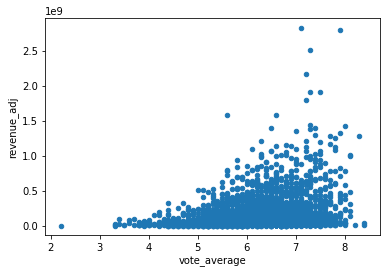

In [13]:
# Is there any correlation between the vote average and the revenues?
df.plot(kind="scatter",x="vote_average",y="revenue_adj")

The Plot shows a positive correlation between the vote average and the revenues

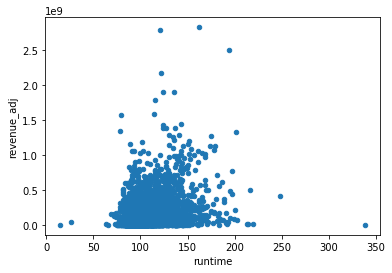

In [14]:
# Is there any relation between the runtime and revenues ?!
df.plot(kind="scatter",x="runtime",y="revenue_adj")

The Scatter shows no relation between runtime and revenues

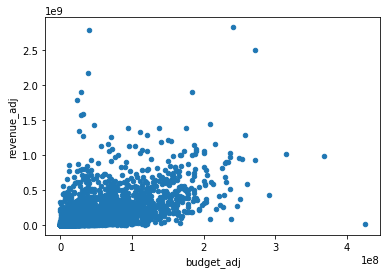

In [15]:
#Finally, is there any relation between the budget and revenue ?!
df.plot(kind="scatter",x="budget_adj",y="revenue_adj")

We still cannot decide if there any relation between budget and revenues.

In [16]:
#check for the correlation coefficients and values
p_coef1,p_value1=stats.pearsonr(df["vote_average"],df["revenue_adj"])    #correlation between vote_average and revenues
print(p_coef1,p_value1)

p_coef2,p_value2=stats.pearsonr(df["runtime"],df["revenue_adj"])    #correlation between runtime and revenues
print(p_coef2,p_value2)

p_coef3,p_value3=stats.pearsonr(df["budget_adj"],df["revenue_adj"])    #correlation between runtime and revenues
print(p_coef3,p_value3)

p_coef3,p_value3=stats.pearsonr(df["popularity"],df["revenue_adj"])    #correlation between popularity and revenues
print(p_coef3,p_value3)

0.268382616785 8.54697006089e-64
0.279836010448 2.02119335887e-69
0.567999399716 4.94065645841e-324
0.544788531222 3.35504451088e-293


>By calculating the pearsons correlation coefficients and values, we can conculade that, there are a weak direct correlation between the vote average, runtime and revenues.
>Also there are a moderate dirct correlation between budget and revenues, and between popularity and revenues.

>To sum up, budget is considered the most important factor that affects the revenues.

### Research Question 2: Which genres are most popular ?

In [79]:
#create new dataframe for popularity and genres only
df_pop_gen=df[["popularity","genres"]]


In [80]:
#Split the "genres" column into 5 columns
df_pop_gen[['g1', 'g2','g3','g4','g5']] = df_pop_gen['genres'].str.split('|', expand=True,)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3140: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [81]:
#drop the genres column
df_pop_gen.drop(columns={"genres"},inplace=True)
#check for number of rows
df_pop_gen.shape

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


(3806, 6)

In [84]:
#convert columns into rows using "melt"
df_pop_gen2=df_pop_gen.melt(id_vars="popularity", var_name="g1")

#check for number of rows again (3806 x 5 = 19030)
df_pop_gen2.shape

(19030, 3)

In [85]:
#remove "g1" column
df_pop_gen2.drop(columns={"g1"},inplace=True)

In [87]:
#check for the final dataset 
df_pop_gen2.head()

,popularity,value
0,32.985763,Action
1,28.419936,Action
2,13.112507,Adventure
3,11.173104,Action
4,9.335014,Action


In [92]:
#groupby genres
df_gen=df_pop_gen2.groupby("value").sum()

In [97]:
#let's see the final dataframe after sorting in descending order
df_gen.sort_values(by="popularity",axis=0,ascending=False,inplace=True)

#final dataset
df_gen

,popularity
value,
Drama,1752.635687
Action,1698.867186
Thriller,1513.963422
Adventure,1397.414053
Comedy,1368.546314
Science Fiction,972.237907
Crime,731.921866
Fantasy,694.597180
Romance,635.125576


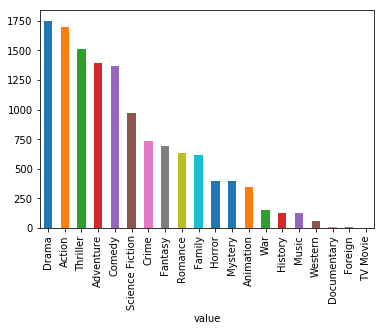

In [102]:
#Draw bar chart for population of different genres
df_gen["popularity"].plot(kind="bar")

> We can conclude that, the most popular genre is Drama 

## Research Question 3: Which year is the highest one in getting total revenues?

In [104]:
#First, let's create new data frame for the years and revenues only
df_yr=df[["release_year","revenue_adj"]]

In [105]:
#check the new dataframe
df_yr.head()

,release_year,revenue_adj
0,2015,1.392446e+09
1,2015,3.481613e+08
2,2015,2.716190e+08
3,2015,1.902723e+09
4,2015,1.385749e+09


In [106]:
#Group the data by years and get the total number of revenues
df_year=df_yr.groupby(by="release_year",axis=0).sum()

In [112]:
#Sort the new dataframe in descending order
df_year.sort_values(by="revenue_adj",ascending=False,axis=0,inplace=True)

In [113]:
#let's see the final dataframe
df_year

,revenue_adj
release_year,
2015,2.410668e+10
2012,2.293733e+10
2013,2.279192e+10
2011,2.269093e+10
2014,2.217063e+10
2009,2.195836e+10
2010,2.180211e+10
2007,1.959778e+10
2008,1.906896e+10


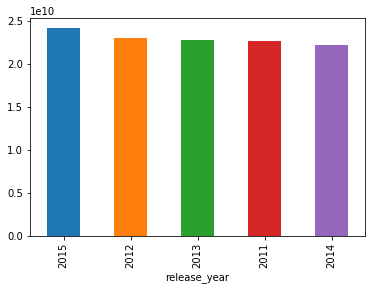

In [117]:
#Draw bar chart dpr the top five years revenues
df_year["revenue_adj"].head().plot(kind="bar")


> We can find that 2015 is the highest year in getting total revenues. Also, we can conclude that the last 5 years 2011, 2012, 2013, 2014 and 2015 are the highest which indicate to the increase in revenues by time.

## Research Question 3: Who is the director produced the largest number of movies?

In [121]:
#We can get director who produced by highest number of movies
df["director"].value_counts().idxmax()

'Steven Spielberg'

We can find that "Steven Spielberg" is the director who produced the highest number of movies.

> But the question: Did Steven Spielberg's movies gain the highest revenues ?!

In [123]:
#let's group the data by the directors
df_dir=df.groupby(by="director",axis=0).sum()

In [126]:
# Sort the grouped data in descending order
df_dir.sort_values(by="revenue_adj",axis=0,ascending=False,inplace=True)

In [127]:
#Check the highest 5 directors that gain revenues
df_dir.head()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
director,,,,,,,
Steven Spielberg,53.455764,3657,36284,184.0,53860,2.076422e+09,1.520245e+10
James Cameron,28.477482,1110,21756,56.8,15953,1.030642e+09,7.327221e+09
Peter Jackson,48.204201,1668,31696,78.6,22041,1.374356e+09,7.019848e+09
George Lucas,23.461834,735,12699,40.2,11927,4.697600e+08,6.313919e+09
Robert Zemeckis,32.156851,1802,21187,100.9,29954,1.319653e+09,5.655648e+09


Actually, we can find that Steven Spielberg the highest total revenues among all other directors 

## Research Question 5: Which movie has the highest net profit ? (net profit = revenues - production cost)

In [128]:
#First, we need to create new column for the net profit (revenues - budget)
df["profit"]=df["revenue_adj"]-df["budget_adj"]

In [129]:
#let's check the new column
df.head()

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,32.985763,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,5562,6.5,2015,1.379999e+08,1.392446e+09,1.254446e+09
1,28.419936,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,6185,7.1,2015,1.379999e+08,3.481613e+08,2.101614e+08
2,13.112507,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2480,6.3,2015,1.012000e+08,2.716190e+08,1.704191e+08
3,11.173104,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,5292,7.5,2015,1.839999e+08,1.902723e+09,1.718723e+09
4,9.335014,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2947,7.3,2015,1.747999e+08,1.385749e+09,1.210949e+09


In [130]:
#now, we can get the movie of the highest net profit
df[df["profit"]==max(df["profit"])]

,popularity,original_title,cast,director,runtime,genres,production_companies,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
1329,12.037933,Star Wars,Mark Hamill|Harrison Ford|Carrie Fisher|Peter ...,George Lucas,121,Adventure|Action|Science Fiction,Lucasfilm|Twentieth Century Fox Film Corporation,4428,7.9,1977,3.957559e+07,2.789712e+09,2.750137e+09


We can find that: "Star Wars" gained the highest net profit ever! the movie directed by "George Lucas" and produced in 1977

## Finally, is there correlation between number of votes and the vate rate ?! so we cannot trust in the votes with small number of voters ?!

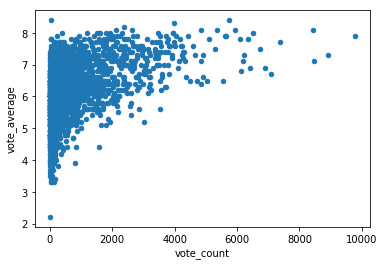

In [131]:
#Draw scatter plot to show the relation between vote_count and vote_average
df.plot.scatter(x="vote_count",y="vote_average")

In [132]:
#we can also the correlation coefficient between vote_count and vote_average
p_coef3,p_value3=stats.pearsonr(df["vote_count"],df["vote_average"])

In [133]:
#let's check the correlation results
print(p_coef3,p_value3)

0.389916191739 1.97404497842e-138


The correlation results show that, there are weak direct correlation between number of votes and average vote rate

<a id='conclusions'></a>
## Conclusions

> ### After answering the 6 propused questions, we can conclude the following:
<li>There are a moderate dirct correlation between budget and revenues, and between popularity and revenues. So budget is considered the most important factor that affects the revenues.
    <li>Drama is the most popular gender, followed by Action then Thriller.
        <li>"Steven Spielberg" is the director who produced the highest number of movies.
            <li>Also, Steven Spielberg achieves the highest total revenues among all other directors.
                <li> 2015 is the highest year in gaining total revenues.
                    <li>"Star Wars" gained the highest net profit ever! the movie directed by "George Lucas" and produced in 1977
                        <li>Finally, there are weak direct correlation between number of votes and average vote rate. So we can consider the average vote rate even if voted by small number of voters.
                        


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [1]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0